## Exploring and Processing Data - Part 1

In [1]:
#imports
import pandas as pd
import numpy as np
import os

### Import data

In [174]:
#set the path of the raw data
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

In [175]:
#read the data with all default parameters
train_df = pd.read_csv(train_file_path, index_col = 'PassengerId')
test_df = pd.read_csv(test_file_path, index_col = 'PassengerId')

In [176]:
#get the type to confirm 
type(train_df)

pandas.core.frame.DataFrame

### Basic Structure

In [9]:
# use .info() to get brief information about the dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


We can analyse the data that we have total 891 rows in the training data set.  We can also find out what are the data types for each column. 
We can easily find out which column has missing values. 
It also highlights memory usage which is very usefull information specially when we deal with large data sets. 


### Understanding titanic dataset

|#|Feature        |Meaning          | 
|:---:|:---:|:---:|
|1|Passenger ID  | Unique passenger id |
|2| Survived     | If Survived(1-yes, 0-no) |
|3| Name         | Name of the passenger |
|4| Sex          | Gender |
|5| Age          | Age of passenger |
|6| SibSp        | Number of siblings / spouses aboard |
|7| Parch        | Number of parents / childer aobard |
|8| Ticket       | Ticket Number |
|9| Fare         | Passenger fare |
|10| Cabin       | Cabin number |
|11| Embarked    | Point of embarkment (C=Cherbourg; Q=Queenstown; S= Southampton) |

In [177]:
# Lets know the test data set
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [178]:
# Add both the dataframe together and create a complete data set
# test data set is missing Survivor column. We can add this column in the test_df and provide some 
# default value.

test_df['Survived'] = -888  # Adding Survived with a default value

In [179]:
# We will concatenet both training and test data set as both has same number of columns now. 
df = pd.concat((train_df, test_df), axis = 0)  

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


If axis = 0 >> Panda will concatenate both the data frame row wise. first train_df rows and then append test_df rows

If axis = 1 >> Panda will concatenate both the data frame column wise. Put value from train_df and in the side test_df rows


In [14]:
# use .head() function to top 5 rows. provide the number of rows 10 to extract 10 rows.

df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742


In [15]:
df.tail(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1300,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,3,female,0,-888,334915
1301,3.0,NaN,S,13.7750,"Peacock, Miss. Treasteall",1,3,female,1,-888,SOTON/O.Q. 3101315
1302,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,female,0,-888,365237
1303,37.0,C78,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1,female,1,-888,19928
1304,28.0,NaN,S,7.7750,"Henriksson, Miss. Jenny Lovisa",0,3,female,0,-888,347086
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,-888,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-888,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-888,359309


### Selection, indexing and filtering using pandas

In [16]:
# column selection using dot
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [17]:
#Selection using column name as string
df['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [18]:
# Selecting multiple column using a list of column name as strings
df[['Name', 'Age']]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
...,...,...
1305,"Spector, Mr. Woolf",NaN
1306,"Oliva y Ocana, Dona. Fermina",39.0
1307,"Saether, Mr. Simon Sivertsen",38.5


### Label based indexing

In [19]:
# indexing: use loc for label based indexing  loc[from_row:to_row,from_column,to_column]
# all columns  rows from passenger id 5 to 10
df.loc[5:10,]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1,237736


In [20]:
# selecting colum range
# select rows from passenger id 5 to 10 and column from Age to Pclass
df.loc[5:10, 'Age':'Pclass']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass
PassengerId,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2


In [21]:
# selecting descrete columns not the range
# elect rows from passenger id 5 to 10 and only columns 'Survived', 'Fare', 'Embarked'
df.loc[5:10,['Survived', 'Fare', 'Embarked']]

,Survived,Fare,Embarked
PassengerId,,,
5,0,8.0500,S
6,0,8.4583,Q
7,0,51.8625,S
8,0,21.0750,S
9,1,11.1333,S
10,1,30.0708,C


### Position based indexing

In [22]:
# indexing: use iloc for position based indexing
# select df from row position 5 to 10 and column position 3 to 8. 
# indexing starts from 0 so rows will be 6 to 10 and column will be [3] Fare to Sex [7]
df.iloc[5:10,3:8]

,Fare,Name,Parch,Pclass,Sex
PassengerId,,,,,
6,8.4583,"Moran, Mr. James",0,3,male
7,51.8625,"McCarthy, Mr. Timothy J",0,1,male
8,21.0750,"Palsson, Master. Gosta Leonard",1,3,male
9,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female
10,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female


In [180]:
# Filter row based on the condition
# Calculate number of male passengr in the dataset
male_passenger = df.loc[df.Sex == 'male',:]
print(f'Number of male passengers : {len(male_passenger)}')

Number of male passengers : 843


In [181]:
# use & and | to build complex logic
# male passenger count in the first class
male_passenger_first_class = df.loc[((df.Sex == 'male') & (df.Pclass == 1)),:]
print(f'Number of male passenger in first class: {len(male_passenger_first_class)}')

Number of male passenger in first class: 179


### Summary Statistics

  **Numerical**
      - Centrality measure (mean, median)
      - Dispersion measure (range, percentiles, variabnce, standard deviation)
  **Categorical**
      - Total count
      - Unique count
      - Category Counts and proportions
      - Per category statistics
      
    
  **Centrality Measure** - Provides a number which can be used to represent entire set of values for certain feature. This number is central to the data thats why we call it as central dendency.
  - **Mean** of 10 Passenger's Age =  Sum of ages / count = 100/10 = 10. It is easily affected with the extream value. If we add one more person with the age 98 then it will jum our mean to 198/11 = 18 years.  which is not true. Most of the people in our data se is children ranging from 9 to 12 and now its showing mean 18 just because of one elder person. which is false information. 
  - **Median** can help us getting rid of the above mean issue. In the Mediun we sort the all 10 ages and we choose the medile number as the Median. Even if we add the 11th engtry with large number is not going to affect the median greatly.
  
   **Spread / Dispersion Measure** - Helps us understand how the values are spread out from the central value.
  - **Variability** How similar and dismilar values are there in given data set. If all values are similar then all values will be around central data. But if the values are very dissimlar then they will be spread out from the central value. 
  - **Range** its simply a difference between maximum and minium. If range is low then values are close to each other and if range is large then it can be spread out. 
  - **Percentiles** - x Percentile is y means x% of values are below y. 50 percentile is 10 means 50% of values are below 10. 25th, 50th and 75th percentile is used to get an idea about the spread of the data. Diving the data in 4 parts. they are also called Quartiles
      - Bucket - 1: Below 25th
      - Bucket - 2: 25th - 50th
      - Bucket - 3: 50th - 75th
      - Bucket - 4: above - 75th

  - **Box-Whisker Plot** - Quartiles are very useful data. Visual representation of the Quartiles are called Box-Whisker Plot
 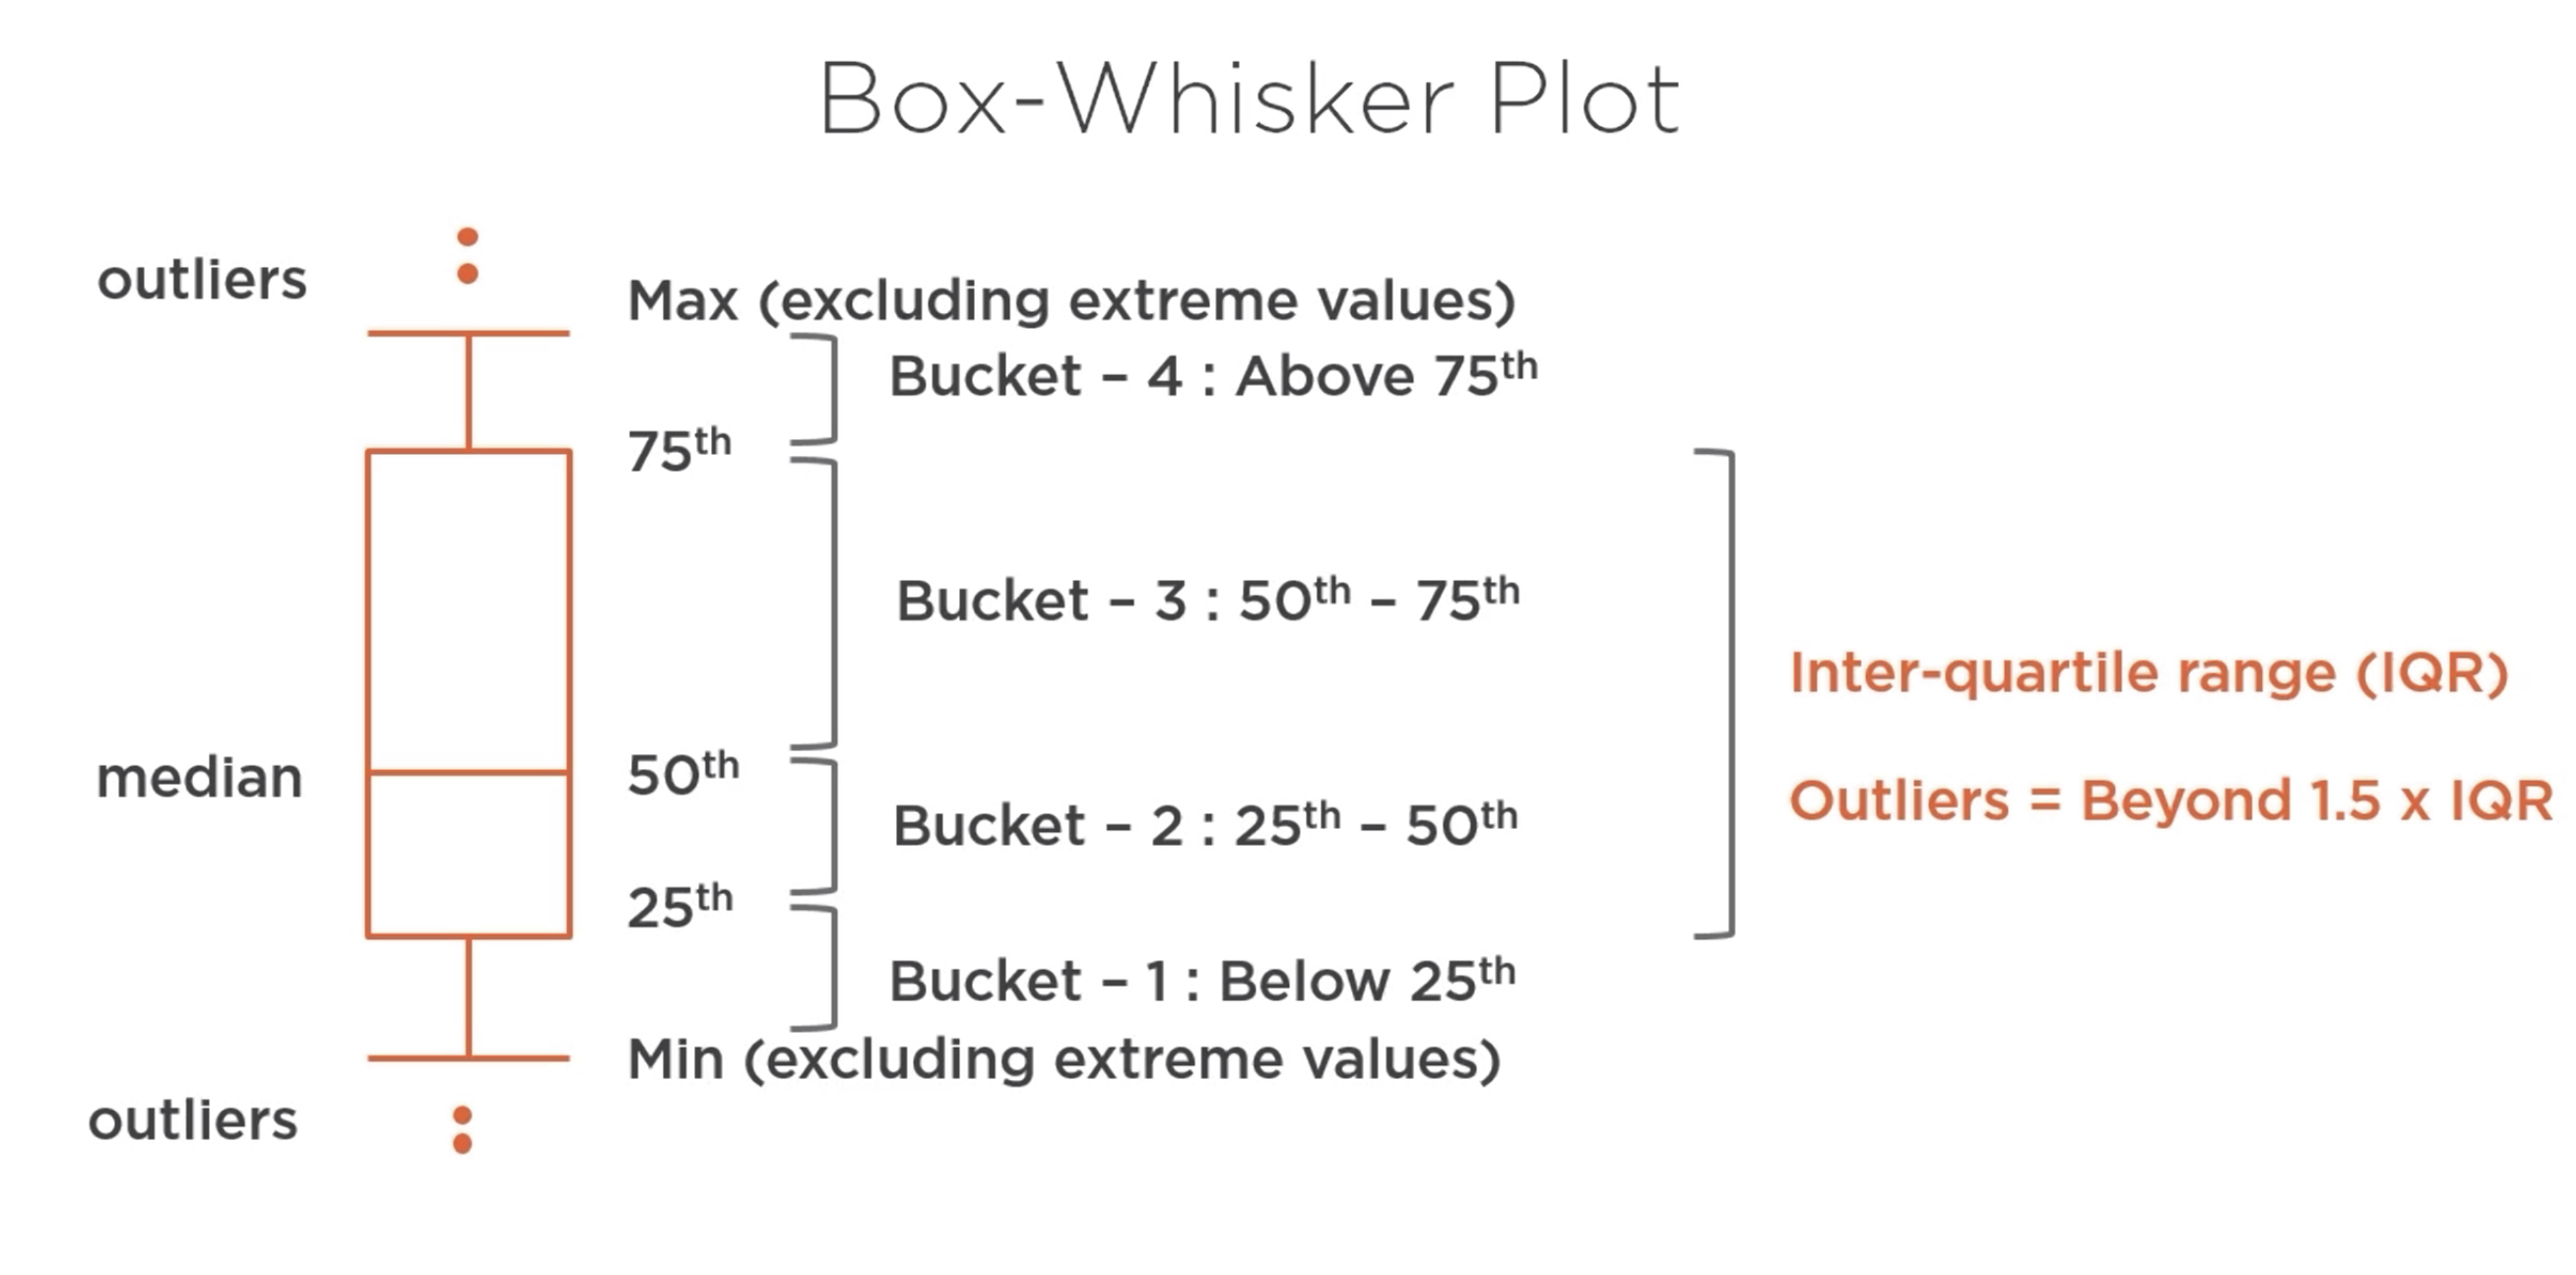
  
  - **Variance** - It is a very important measure of variability. It shows how far each value in the list is from mean value. 
      - Small variance = less spread
      - High variance = large spread
   - Variance = sum((value-mean)^2)/count
   - it is affected by extreme values
   - unit is not clear
  
  - **Standard deviation** - Standard deviation is the sqrt value of variance. This way unit of the standard deviation becomes the same as the unit of feature. 
      - low standard deviation = less spread
      - high standard deviation = large spread
      
 #### Categorical
  - **Counts and Proportions** - Gender is categorical feature. it has only two values M and F. Total count 10, Unique count 2. 
       - Male count: 4 Proportion:  4/10=0.4
       - Female Count: 6 Proportion: 6/10 = 0.6

In [27]:
# use .describe() to get statistics for all numeric columns
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [182]:
# numerical feature
# centrality measure
print(f'Mean fare: {df.Fare.mean()}') #mean
print(f'Median fare: {df.Fare.median()}') #median

Mean fare: 33.2954792813456
Median fare: 14.4542


In [183]:
# disperson measures
print(f'Min fare: {df.Fare.min()}') #mean
print(f'Max fare: {df.Fare.max()}') #median
print(f'Fare range: {(df.Fare.max()-df.Fare.min())}') #mean
print(f'25 percentile: {df.Fare.quantile(.25)}') #median
print(f'50 percentile: {df.Fare.quantile(.5)}') #mean
print(f'75 percentile: {df.Fare.quantile(.75)}') #median
print(f'Variance fare: {df.Fare.var()}') #mean
print(f'Standard deviation: {df.Fare.std()}') #median

Min fare: 0.0
Max fare: 512.3292
Fare range: 512.3292
25 percentile: 7.8958
50 percentile: 14.4542
75 percentile: 31.275
Variance fare: 2678.959737892894
Standard deviation: 51.75866823917414


In [184]:
%matplotlib inline

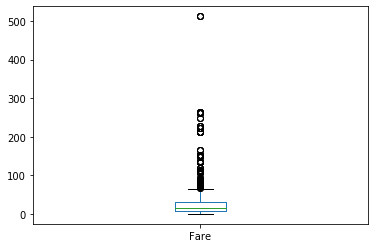

In [185]:
# box-whisker plot
df.Fare.plot(kind='box')

In [33]:
# use .describe(include='all') to get statistics for all columns including non-numeric 
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [34]:
# categorical columns : Counts
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [35]:
# categorical columns :get the proportion
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [36]:
#check in training data set how many passenger survived
df[df.Survived!=-888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [37]:
# count: Passenger class
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

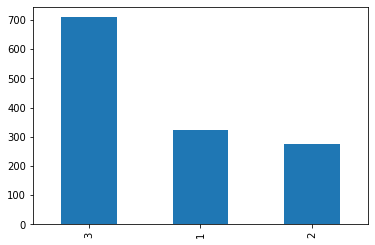

In [39]:
#visualize counts
df.Pclass.value_counts().plot(kind='bar')

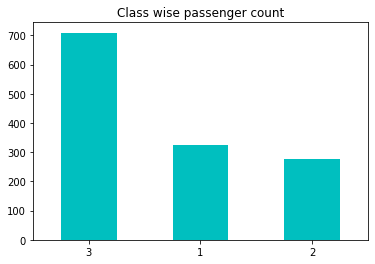

In [41]:
#title : to set title, color: to set color, rot: to rotate labels and semicolon at the end to remove matplotlib information
df.Pclass.value_counts().plot(kind='bar', rot=0, title='Class wise passenger count', color='c');

## Data Exploring-Processing Part 2

**Overview**
  - Exploratory data analysis concepts
       - Distributions
       - Grouping
       - Crosstabs
       - pivots
       
**Distribution** 
   - It is a very important concepts in exploratory data analysis phase. There are several visualization tools which can help us see the distribution of data. We already saw Box plot
        - Univariate: Visualizing one feature at one time.
          - Histogram
          - Kernel Density Estimation (KDE) plot
        - Bivariate: Visualizing two features at one time/
          - Scatter plot
  **Histogram** : Histogram is basically the feature representation of distribution of values in different bins(Bucket). 
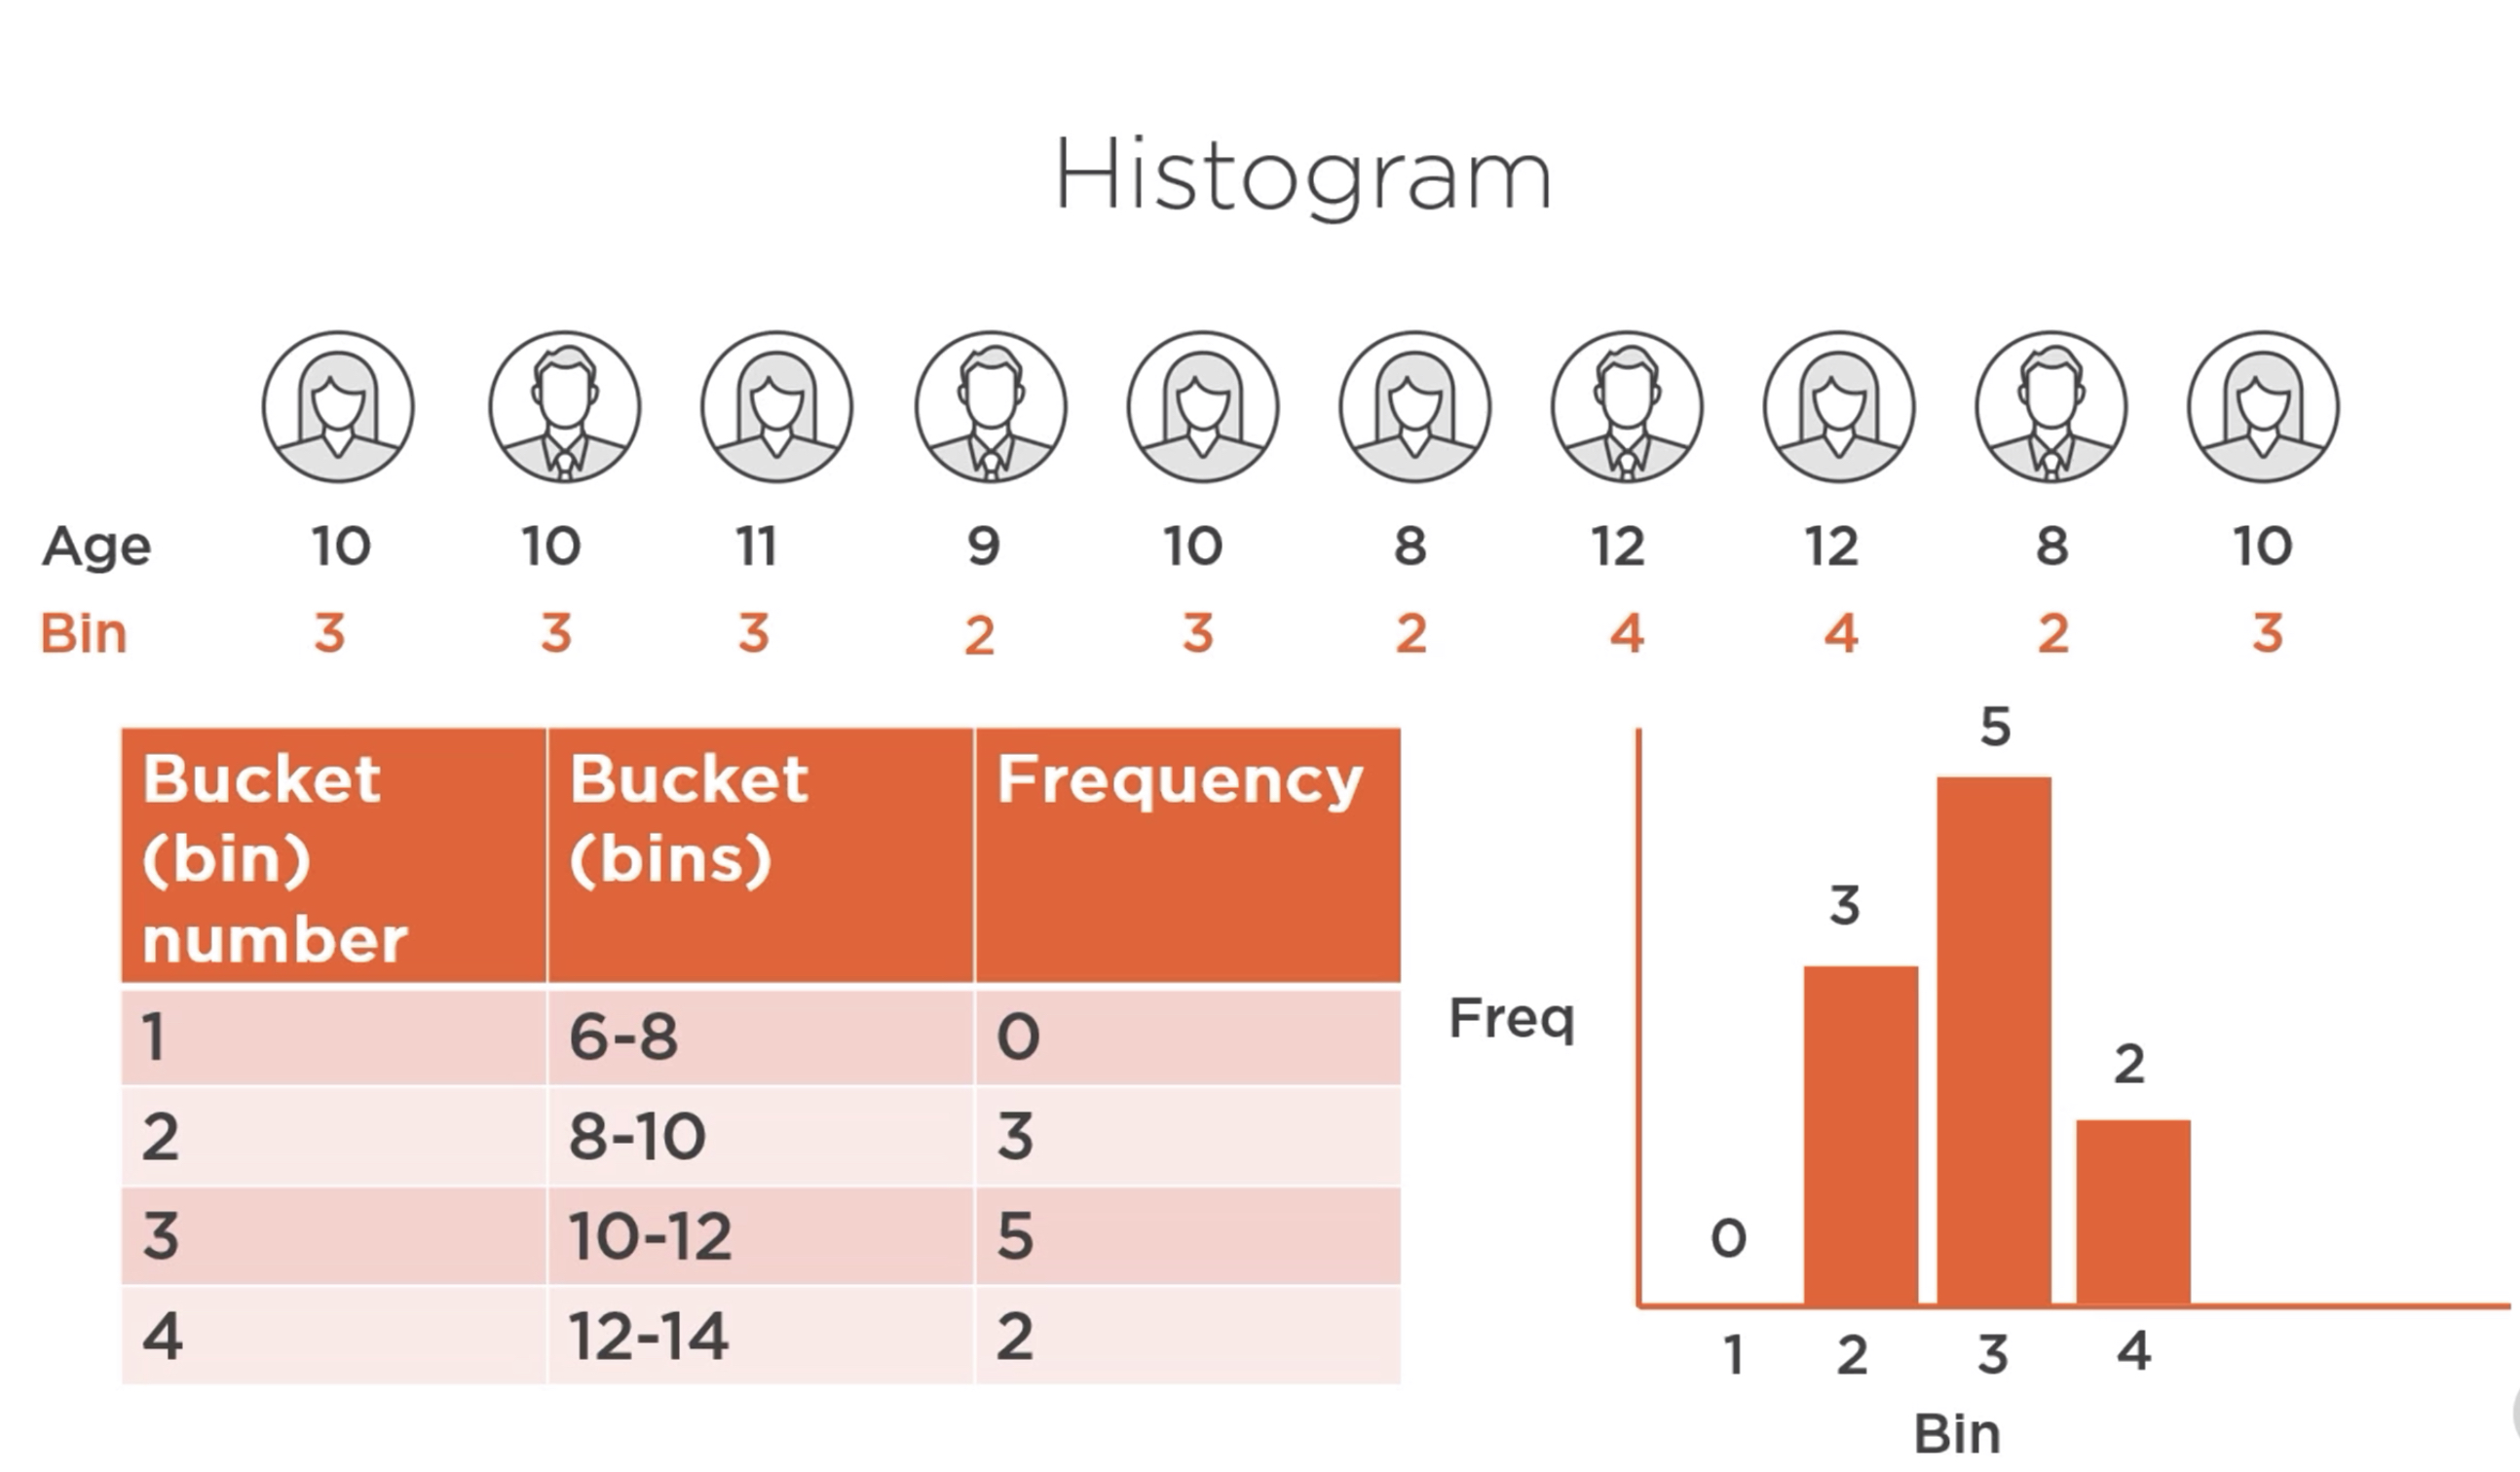

  **KDE (Kernel Density Estimation)** : Unlike Histogram, in KDE we talk about probability instead of frequency. 
  High frequency -> High Probability
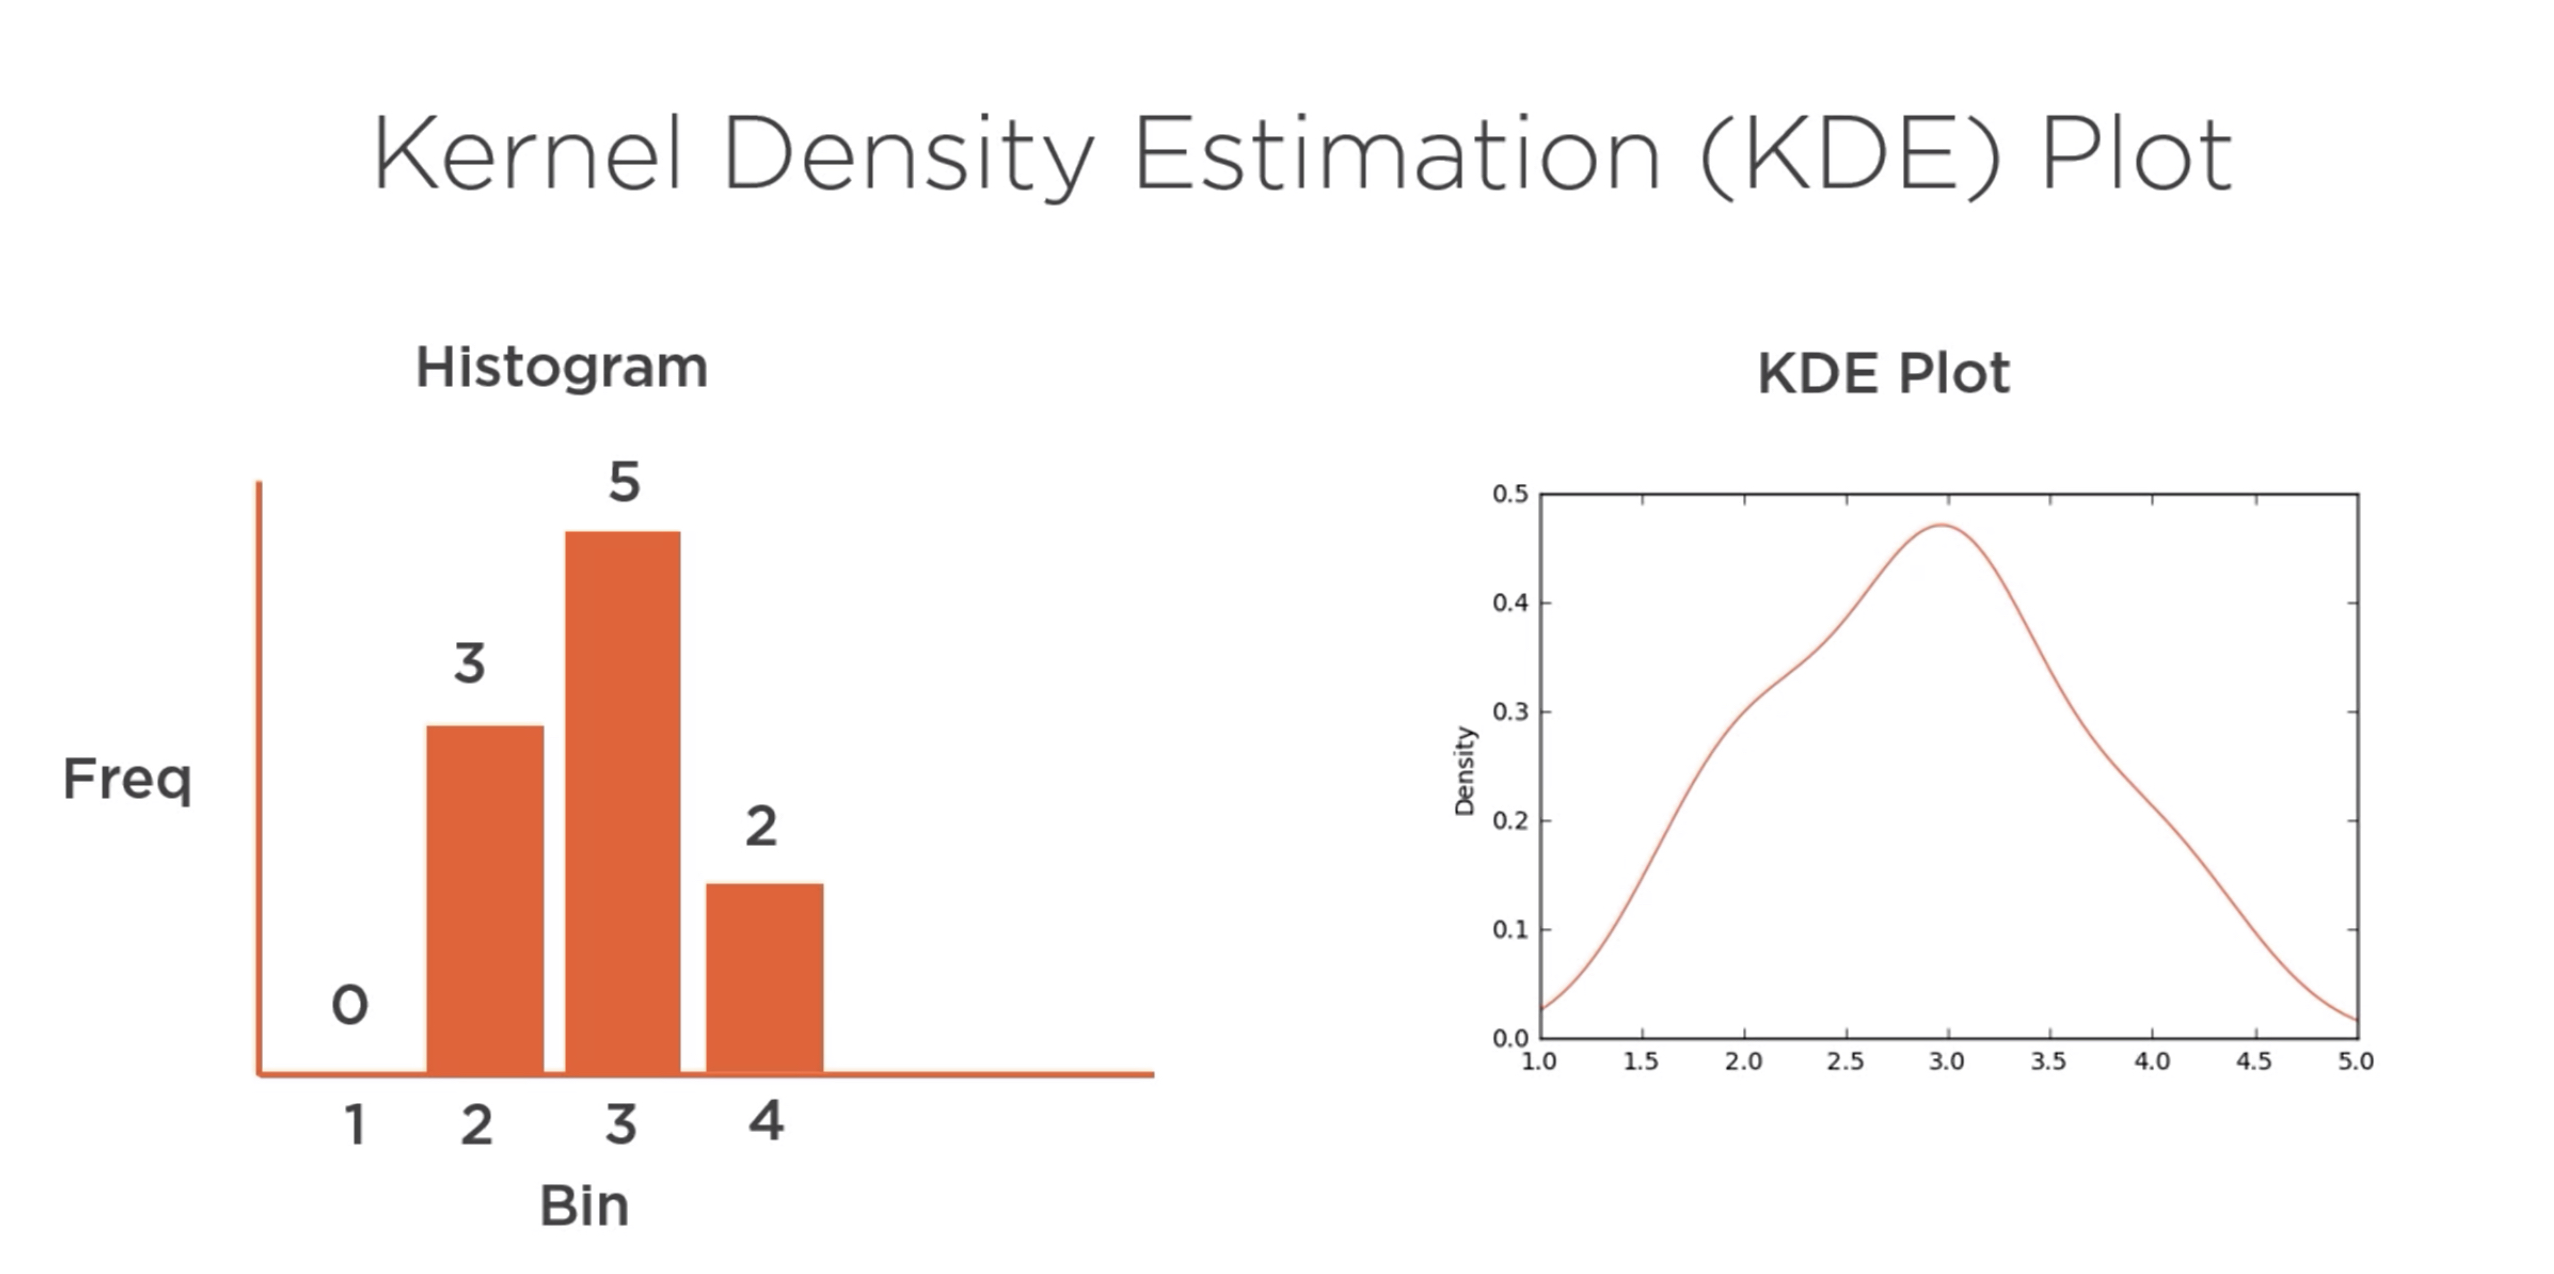
       

**Normal Distribution** - Most common distribution is Normal Distribution. Purfect Normal Distribution would look like. Skewness is 0 in Perfect Normal Distribution. 
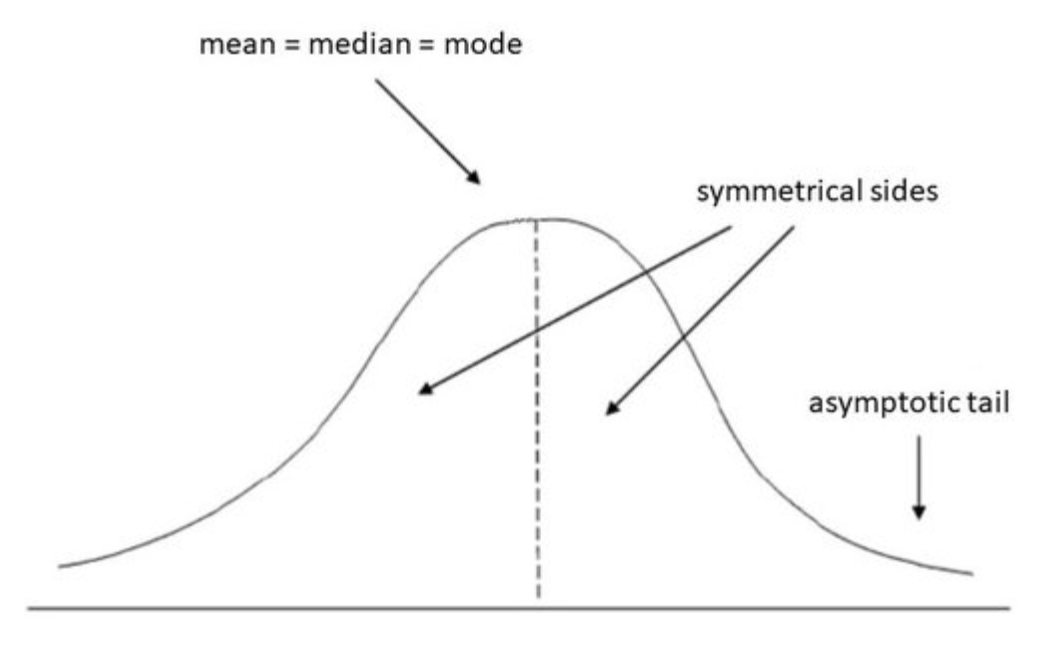
   - If the mean > Median line means it is skewed towards the right. It has the right long tail. In such cases the skewed value will be possitve. 
   - If the mean < Median line means it is skewed towards the left. It has the left long tail. In such cases the skewed value will be negative.  

### Univariate Distribution Plots

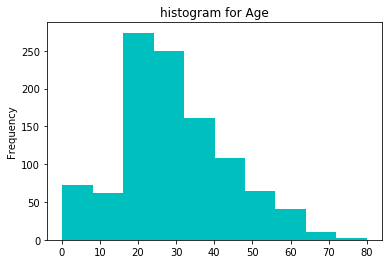

In [42]:
# use hist to create histogram
df.Age.plot(kind='hist', title='histogram for Age', color='c');

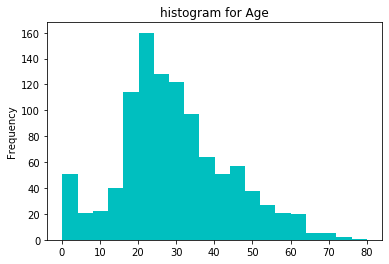

In [43]:
#use bins to add or remove bins
df.Age.plot(kind='hist', title='histogram for Age', color='c', bins=20);

#this will show if our data is positive skewed or negative. 

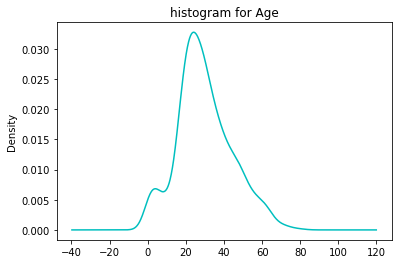

In [44]:
# use kde to create density plot
df.Age.plot(kind='kde', title='histogram for Age', color='c');

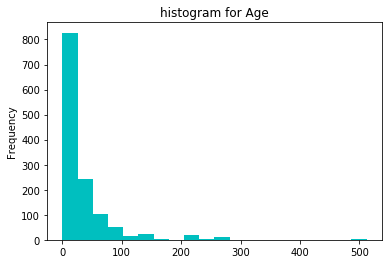

In [45]:
#Create Histogram for fare
df.Fare.plot(kind='hist', title='histogram for Age', color='c', bins=20);

#this will show if our data is positive skewed or negative. 

In [186]:
# Compare the skewness of two variable we can use ske() function
print(f'skewness of age: {df.Age.skew()}')
print(f'skewness of fare: {df.Fare.skew()}')

skewness of age: 0.40767455974362266
skewness of fare: 4.367709134122922


**Skewness of age is slightly higher than 0 however skewness of fare is way higher than 0.**

### Bivariate Distribution : Scatter Plot

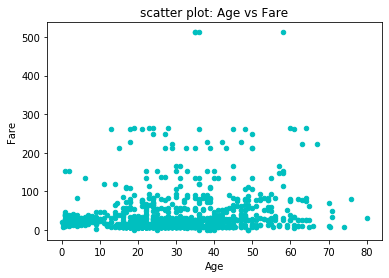

In [47]:
# lets find out if there is any relation between passenger Age and its Fare using scatter plot
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot: Age vs Fare');

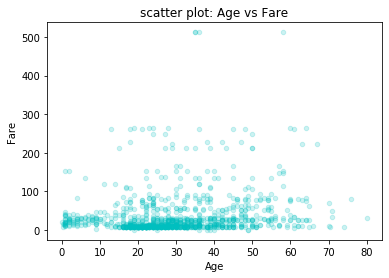

In [48]:
# use alpha value to set the transparency
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot: Age vs Fare', alpha=0.2)

**Conclusion: Above graphs shows that there is no relationship between Age and Fare**

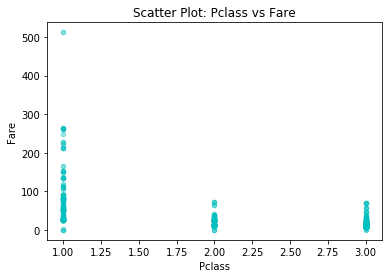

In [49]:
#Scatter plot between Pclass and Fare
df.plot.scatter(x='Pclass', y='Fare', color='c', title='Scatter Plot: Pclass vs Fare', alpha=0.15);

### Grouping and Aggregations


In [187]:
#group by
df.groupby('Sex').Age.median()

#this tell us what is the median age of male and female passenger

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [52]:
#group by
df.groupby(['Pclass']).Fare.median()
#this tells us what is the median fare paid by each class of passenger.

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [54]:
df.groupby(['Pclass']).Age.median()

#median age of the passengers traveling in each class

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [55]:
df.groupby(['Pclass'])['Fare', 'Age'].median()

#median age and fare of passenger traveling in each class

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [56]:
df.groupby(['Pclass']).agg({'Fare' : 'mean', 'Age' : 'median'})

#Mean of Fare and Median of Age for the passenger traveling in each class

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [57]:
#Completecate Aggregations 
aggregations = {
    'Fare': {
        'mean_Fare': 'mean',
        'median_Fare': 'median',
        'max_Fare': max,
        'min_Fare': np.min
    }, 
    'Age': {
        'median_Age':'median', 
        'mean_Age': 'mean',
        'max_Age': max,
        'range_Age': lambda x: max(x)-min(x)
    }
}

In [58]:
df.groupby(['Pclass']).agg(aggregations)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


Fare                                       Age             \
        mean_Fare median_Fare  max_Fare min_Fare median_Age   mean_Age   
Pclass                                                                   
1       87.508992     60.0000  512.3292      0.0       39.0  39.159930   
2       21.179196     15.0458   73.5000      0.0       29.0  29.506705   
3       13.302889      8.0500   69.5500      0.0       24.0  24.816367   

                          
       max_Age range_Age  
Pclass                    
1         80.0     79.08  
2         70.0     69.33  
3         74.0     73.83

In [60]:
#grouping by multipel features
df.groupby(['Pclass', 'Embarked']).Fare.median().unstack()

Embarked,C,Q,S
Pclass,,,
1,76.7292,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


### Crosstabs

In [63]:
#crosstab on Sex and Pclass
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


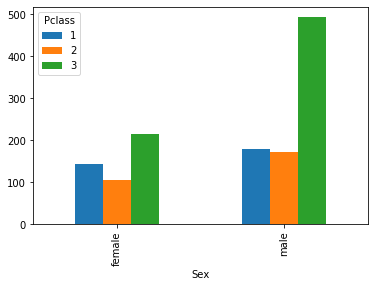

In [64]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar');

### Pivots

In [67]:
# Pivot table
df.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [68]:
df.groupby(['Sex', 'Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [70]:
df.groupby(['Sex', 'Pclass', 'Embarked']).Age.mean().unstack()

Embarked               C          Q          S
Sex    Pclass                                 
female 1       38.107692  35.000000  35.609375
       2       19.363636  30.000000  28.455165
       3       16.818182  24.333333  22.854771
male   1       40.047619  44.000000  41.705977
       2       27.269231  53.750000  30.491702
       3       24.129474  26.738095  26.146241

## Data Munging - Feature Engineering - Advance Visualization
   - **Data Munging**
     - Treating Missing Values
     - Working with Outliers**
     
   - **Feature Engineering**
     - Derived features
     - Categorical Feature encoding
   
   - **Reproducible Script**
   - **Visualization**
   
   - **Python Tools**
     - Numpy
     - Pandas
     - Matplotlib
     
### Data Munging
  - Common lingo used by data scientist that involves activities such as looking potential issues in the data and solving them using appropriate technique.
  - Most common data quality related issues
     - Missing values
     - Extreme values (Outliers)
     - Erroneous Values (Difficult to detect unless its extreme in nature)
     
 - **Missing Value**
     - Value not known
     - Very common in real world
     - Several Reasons
       - Non availability
       - Manual data entry process
       - Equipment error
     - Issue related to Missing Value
       - It can lead to Inaccurate analysis
       - Modeling won't work in many cases
     - Solution
       - Deletion of those rows:  Only if few values are missing
       - Imputation: We can not throw away data by deleting them. We can add missing              values and preserve entire row. 
 - **Imputtation techniques**
     - Mean Imputation: Update the missing value with the mean of the column. its very          common technique but it can lead to the problem as higher value drastically              changes the mean. 
     - Median Imputation: Median is not affected by presence of extream value. Replace          missing values with the median of the column
     - Mode Imputation: Its usefull for categorical features missing values. We take the        highest frequency value in the column and replace the missing value with that. 
     - Forward / Backword fill: This is normaly used when we have time series and                sequential data. 
       - Forward fill: In this we take previous available value to replace missing value.
       - Backwork fill: We take the next available value to replace missing value.
     - Predictive Model : We use different predictive model to calculate missing value          based on the available values. **Explore More about Predictive Model**
       
   

In [188]:
# use .info() to detect missing values (if any)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### Feature: Embarked missing value treatment

In [189]:
# extract rows with Embarked as Null
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [74]:
# how may people embarked at differnt placess and find out the most common embarkment point
df.Embarked.value_counts()

# we can fill the missing values with the S as most people embarked from S.

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [76]:
# we can analyze further and see both of the passenger survived the disaster. So we should find out from which
#Embarked point most people survived that will be more logical. 
pd.crosstab(df[df.Survived!=-888].Survived, df[df.Survived!=-888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [ ]:
# imput the missing value with 'S'
# df.loc[df.Embarked.isnull(),Embarked]='S'
# df.Embarked.fillna('S', inplace=True)

#inplace=True - Existing dataframe gets updated with S
#Inplace=False -panda creates the copy of the data frame and repladce the missing value

**We can see both the missing passenger Fare is 80 and both are 1st class passenger. We can explore that from which Embarked value people have paid near 80 fare in first class.**

In [77]:
#option 2 : explore the fare of each class of each embarkment point 
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

**We can see here that class 1 passenger who embarked from the C has paid 76.7292 Fare which is very close to 80. There may be possibility that those two passenger who does not have embarked data have boarded from C.**

In [190]:
# imput the missing value with 'C'
df.Embarked.fillna('C', inplace=True)

In [79]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### Feature: Fare missing value issues

In [81]:
#see the row where fare is missing. 
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [87]:
df.groupby(['Embarked', 'Pclass']).Fare.median()

Embarked  Pclass
C         1         78.2667
          2         15.3146
          3          7.8958
Q         1         90.0000
          2         12.3500
          3          7.7500
S         1         52.0000
          2         15.3750
          3          8.0500
Name: Fare, dtype: float64

In [192]:
#calculate the median fare for Embarked in S and Pclass is 3.
median_fare = df.loc[(df.Embarked == 'S') & (df.Pclass == 3),'Fare'].median()


In [193]:
median_fare

8.05

In [194]:
df.Fare.fillna(median_fare, inplace=True)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### Feature: Age Missing value

In [96]:
#set maximum number of rows to be displayed
pd.options.display.max_rows = 15

In [196]:
#return null rows
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,3,female,0,-888,334915
1302,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,female,0,-888,365237
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236


### Option 1: replace all missing age with mean value 
This is not an effective method

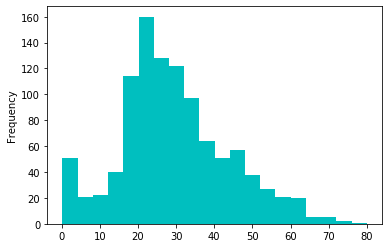

In [98]:
#plot histogram for the Age
df.Age.plot(kind='hist', bins=20, color='c');

In [99]:
#mean of age
df.Age.mean()

29.881137667304014

**Issue**: ***Due to high value of 70s and 80s mean is pushed to almost 30s***

In [ ]:
#replace missing values with mean
# df.Age.fillna(df.Age.mean(), inplace=True)

### Option 2: replace missing value with median age of gender

In [101]:
#medain values
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

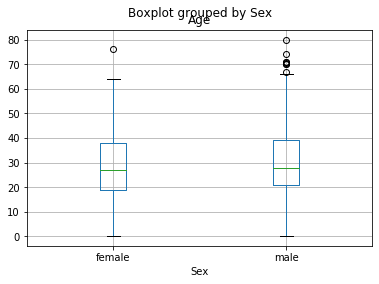

In [103]:
# visualize using boxplot
df[df.Age.notnull()].boxplot('Age', 'Sex');

**We can see median age of both Male and Female is almost the same. there very little difference. It is not the best option**

In [ ]:
# replace
# age_sex_median = df.groupby('Sex').Age.transform('median')
# df.Age.fillna(age_sex_median, inplace=True)

### Option 3: Replace with median age of Pclass

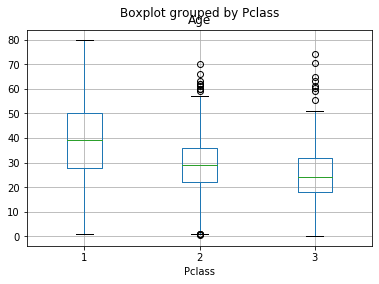

In [104]:
df[df.Age.notnull()].boxplot('Age', 'Pclass');

**So far this looks the best option as median age of passenger traveling in different classes are different.**

In [ ]:
#replace
# age_pclass_median = df.groupby('Pclass').Age.transform('median')
# df.Age.fillna(age_pclass_median, inplace = True)

### Option 4: Replace with median age of title
**Extract the title from the name column and create a separate column title. Then check median age of each title.
Title of a name mostly gives us the age information. if its master then it is kid and its sir or dr means its old person**

In [105]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [108]:
# Function to extract the title from the name. There is pattern in the titel. Starts with last name, title. first name middle name. 
def getTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()  # strip out all of the whitespaces and coverting the title to lower case
    return title


In [109]:
# use map function to apply the function on each Name value row i
df.Name.map(lambda x : getTitle(x))   #alternatively we can use : df.Name.map(getTitle)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
         ...  
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [110]:
# find out how many unique title we have
df.Name.map(lambda x : getTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [197]:
# We will modify our getTitle function here and we will introduce the dictionary to create custome tile.
# this is to club some of the title
def getTitle(name):
    title_group = {'mr' : 'Mr',
                'mrs' : 'Mrs',
                'miss' : 'Miss',
                'master' : 'Master',
                'don' : 'Sir',
                'rev' : 'Sir', 
                'dr' : 'Officer',
                'mme' : 'Mrs',
                'ms' : 'Mrs',
                'major' : 'Officer',
                'lady' : 'Lady',
                'sir' : 'Sir', 
                'mlle' : 'Miss',
                'col' : 'Officer',
                'capt' : 'Officer',
                'the countess' : 'Lady',
                'jonkheer' : 'Sir', 
                'dona' : 'Lady'
    }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [198]:
# Create title feature
df['Title'] = df.Name.map(lambda x : getTitle(x))

In [199]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


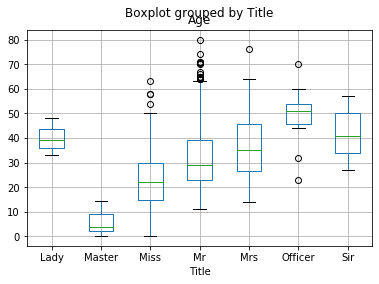

In [118]:
#Box plot of Age with title
df[df.Age.notnull()].boxplot('Age', 'Title');

**We can see that each title has a different median value and they also have different Age range. It makes most sense to replace the Age median to the median of each title.**

In [200]:
# replace missing value
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median, inplace=True)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


### Working with outliers
 - Outliers are significantly differnt from normal behavior
 - There could be multiple reasons
     - Data entry - some has enter exteam value
     - Data processing - Can be result of data processing logic
     - Natural - By nature it can be exteam
 - Issues
     - Biased analysis:  Analysis can be biased due to extreme values
     - Biased models
 - Outlier Detection
     - Historgram can be used if working with one variable. it can detect the outliers. 
     - Box Plot - Univariate outliers
     - Scatterplot  - Usefull to defect outliers in bivariaate 
 - Resolve 
     - Remove - We can simply remove the data but we can throw away some other important information so its not          advisable. 
     - Transformation - Apply a log function or square root of outliers to reduce the impact during analysis
     - Binning - Create bins and put the values. may be we can create a separate bin to put the extream values. 
     - Imputation - it is also used to treat outliers. We can replace extream values with plausible values. 

#### Age Outliers

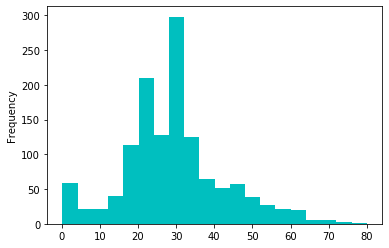

In [123]:
# use histogram to understand the distribution 
df.Age.plot(kind='hist', bins=20, color='c');

In [124]:
# we can also see how many passenger's age is great than 70
df.loc[df.Age>70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,Mrs


#### Fare outliers

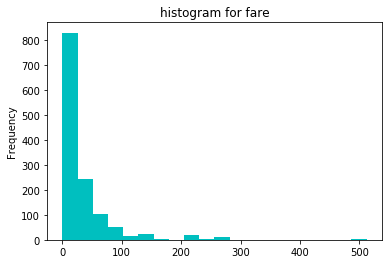

In [126]:
#histogram for fare
df.Fare.plot(kind = 'hist', title='histogram for fare', bins=20, color='c');

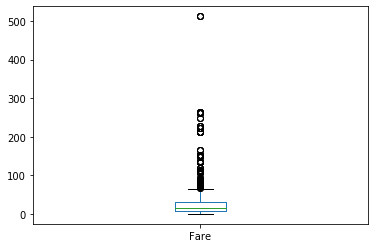

In [127]:
# we can clearly see there are outliers in Fare some people paid more than 500
# create box plot to identify outliers
df.Fare.plot(kind='box');

In [128]:
# look at the outlers rows
df.loc[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs


**Analysis**: Passenger in our training data set has same ticket number. They are in the same class and paid same Fare 512.3292. They may be from the same family or booked at the last moment. 

In [129]:
# try some transformation to reduce the skewness
LogFare = np.log(df.Fare + 1.0)  # Adding 1 to accom

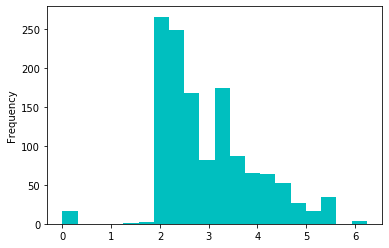

In [130]:
# HIstogram of LogFare
LogFare.plot(kind = 'hist', color='c', bins=20);

#### Binning

In [131]:
#Binning - qcut() performs quantile based binning. We are splitting the Fare in 4 bins here, Where each bins contains almost equal number of observations.
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
              ...        
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [132]:
#Specify the name of each bins
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])  # discretization

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
          ...    
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < high < very_high]

**Clearly we have converted a numerical feature Fare to categorical feature, wher each bin is one category. Such techniques are called Discritization.**

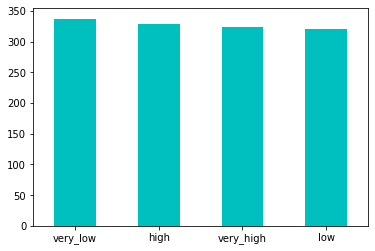

In [133]:
# lets see the number of obervations in each bins
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']).value_counts().plot(kind='bar', color='c', rot=0);

In [202]:
# create a new feature fare_bin and store the value of fare bin. 
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])

In [203]:
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr,very_low
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs,very_high
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss,low
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs,very_high
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr,low
6,29.0,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877,Mr,low
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463,Mr,very_high
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909,Master,high
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742,Mrs,low


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
Fare_Bin    1309 non-null category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 134.4+ KB


## Feature Engineering

**Process of transforming raw data to better representative features in order to create better predictive models**

  - Transformation : It can be simple taking a log. Or it can be complecated method of       using complicated algorithm. 
  - Feature Creation: Using domain experties you can create new features. 
  - Feature Selection: Use domain experties and feature selection algorithm 
  
**"Feature engineering is an art."**

**Domain Knowledge + Technical Expertise**
              
              
              
### Feature: Age State (Adult or Child)      
We are creating this feature because child might have given the priority to use life boats, intern they have more survival rate.


In [205]:
# AgeState based on Age
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult', 'Child')
 

In [206]:
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [140]:
#Corsstab to see the survival rate for the AgeState
pd.crosstab(df[df.Survived!=-888].Survived, df[df.Survived!=-888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


As expected survival rate of the children are more than adult. More than 54% kids survived, however only 36% adult survived.

### Feature: FamilySize
We are creating this because there may be possibility that small family size have the higher survival rate as one person get in to the board then another might have got to. Whereas for the big family size survival may be low due to panic about who will be going in a life boat. 


In [207]:
#Family : Adding Parents with Siblings
df['FamilySize'] = df.Parch + df.SibSp + 1  # adding one for self

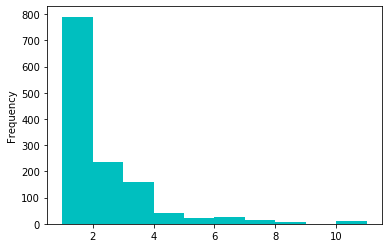

In [208]:
# explore the family feature
df['FamilySize'].plot(kind='hist', color='c');

In [143]:
# Extreme values always carries some interesting information. lets explore it
df.loc[df.FamilySize == df.FamilySize.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize
PassengerId,,,,,,,,,,,,,,,
160,4.0,NaN,S,69.55,"Sage, Master. Thomas Henry",2,3,male,8,0,CA. 2343,Master,very_high,Child,11
181,22.0,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
202,29.0,NaN,S,69.55,"Sage, Mr. Frederick",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
325,29.0,NaN,S,69.55,"Sage, Mr. George John Jr",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
793,22.0,NaN,S,69.55,"Sage, Miss. Stella Anna",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
847,29.0,NaN,S,69.55,"Sage, Mr. Douglas Bullen",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
864,22.0,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
1080,22.0,NaN,S,69.55,"Sage, Miss. Ada",2,3,female,8,-888,CA. 2343,Miss,very_high,Adult,11
1234,29.0,NaN,S,69.55,"Sage, Mr. John George",9,3,male,1,-888,CA. 2343,Mr,very_high,Adult,11


In [144]:
#Create a cross table to show the Family Size survival rate
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### Feature : IsMother
We are creating this feature because there can be possibility that Mother with the child may have given higher priority to get into the lifeboat. 

In [209]:
# a lady aged more than 18 who has Parch > 0 and is married (Not Miss)
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')), 1, 0)

In [210]:
#creat cross table to see if motherhood has the factor to the survival
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 16 columns):
Age           1309 non-null float64
Cabin         295 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int64
dtypes: category(1), float64(2), int64(6), object(7)
memory usage: 165.1+ KB


### Feature: Deck
Deck information can provide the passenger's location in the ship, It can provide social economic status of the passenger, which intern can give information on availability of life boats. 



In [147]:
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
        ... 
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 1309, dtype: object

In [148]:
# Use the unique() function to get the unique cabin list.
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [150]:
# look at the cabin = T
df.loc[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,very_high,Adult,1,0


**We do not want to create a separate deck for 1 passenger so lets assume that this information T is there by mistake. We can setup this value as Nan**

In [212]:
#set the value NaN
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [213]:
# look at the unique value of cabin again
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [214]:
# extract first character of Cabin string to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(),'z')
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [215]:
# check counts
df.Deck.value_counts()

z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [216]:
#creat cross table to see if the survival rate for the Deck
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int64
Deck          1309 non-null object
dtypes: category(1), float64(2), int64(6), object(8)
memory usage: 175.3+ KB


## Categorical Feature Encoding

 - In this process we convert categorical feature to numerical feature. We perform such conversion because almost all machine learning algorithm expect numerical values.
 
 -  Common Categorical Feature Encoding Methods
     - Binary Encoding : We can use this when we have categorical feature with only 2 classes. For example Is_male or Is_female. 
     - Label Encoding: Multiple categories feature can use this method. for example Low, Medium and High value can be encoded as 1, 2 and 3. If we have ordered feature then we can use label encoding.
     - One-Hot Encoding:  When multiple categories are not in order then we can use One-Hot Encoding. it is one of the most popular technique of encoding. For example  Embarked - value A, B, C. Label encoding will not make sense here as there is no order here. We create three separate column to handle. is_A, is_B, is_C. It is a very safe way to encode the categorical feature when we have small number of categories. 
     

In [218]:
# Sex - Feature encoding - It binary encoding
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [219]:
#perform encoding for several colums at once. We are performing one-hot encoding here. pd.get_dummies function is used to perform encoding

df = pd.get_dummies(df,columns=['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState'])

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int64
IsMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

### Drop and Reorder Columns using pandas
- We do not need following features:
    - Cabin: We have used Cabin information to create a feature Deck so we do not need this. 
    - Name: We have extracted title to create title feature we do not need name any more. 
    - Ticket : We will drop this for future prediction.
    - Parch and SibSp : We have used this to create a feature family size so we can remove these features. 
    - Sex : We have already created IsMail column as part of binary encoding we do not need Sex column any more. 

In [221]:
# drop columns using df.drop
df.drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis = 1, inplace=True)

In [222]:
# reorder column
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [223]:
df['Survived'].value_counts()

 0      549
-888    418
 1      342
Name: Survived, dtype: int64

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
FamilySize            1309 non-null int64
IsMother              1309 non-null int64
IsMale                1309 non-null int64
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

## Save Processed Dataset
Save the file in to the directory under our cookie cutter framework. We wil save this under the folder processed inside data folder. 

In [6]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

In [227]:
#training data
df.loc[df.Survived != -888].to_csv(write_train_path)

#test data
columns = [column for column in df.columns if column != 'Survived']
df.loc[df.Survived == -888, columns].to_csv(write_test_path)

## Building the data processing reproducible script

In [2]:
# Create a processed data script file and its path to store the script. We will create and add file under src/data folder as per cookiecutter framework

get_processed_data_script_file = os.path.join(os.path.pardir, 'src', 'data', 'get_processed_data.py')

In [3]:
%%writefile $get_processed_data_script_file
import numpy as np
import pandas as pd
import os

def read_data():
    #set the path of the raw data
    raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
    train_file_path = os.path.join(raw_data_path, 'train.csv')
    test_file_path = os.path.join(raw_data_path, 'test.csv')
    
    #read the data with all default parameters
    train_df = pd.read_csv(train_file_path, index_col = 'PassengerId')
    test_df = pd.read_csv(test_file_path, index_col = 'PassengerId')
    
    test_df['Survived'] = -888
    df = pd.concat((train_df, test_df), axis=0, sort=True) 
    return df

def process_data(df):
    #using the method chaining concept
    return (df
         # create title attribute - then add this
         .assign(Title = lambda x: x.Name.map(get_title))
         # working missing values - start with this
         .pipe(fill_missing_values)   
         # Create Fare_Bin Feature
         .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']))
         # Create ageState
         .assign(AgeState = lambda x : np.where(x.Age >= 18, 'Adult', 'Child'))
         # Creat FamilySize
         .assign(FamilySize = lambda x : x.Parch + x.SibSp + 1)
         # Create IsMother   
         .assign(IsMother = lambda x : np.where(((x.Sex == 'female') & (x.Parch > 0) & (x.Age > 18) & (x.Title != 'Miss')), 1, 0))  
         # Create Deck feature
         .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin))
         .assign(Deck = lambda x : x.Cabin.map(get_deck))   
         # Feature Encoding
         .assign(IsMale = lambda x : np.where(x.Sex == 'male', 1,0))
         .pipe(pd.get_dummies, columns=['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState'])
         # Add code to drop unnecessarey columns
         .drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis = 1)   
         # Reorder columns
         .pipe(reorder_columns)
           )

def get_title(name):
    title_group = {'mr' : 'Mr',
                'mrs' : 'Mrs',
                'miss' : 'Miss',
                'master' : 'Master',
                'don' : 'Sir',
                'rev' : 'Sir', 
                'dr' : 'Officer',
                'mme' : 'Mrs',
                'ms' : 'Mrs',
                'major' : 'Officer',
                'lady' : 'Lady',
                'sir' : 'Sir', 
                'mlle' : 'Miss',
                'col' : 'Officer',
                'capt' : 'Officer',
                'the countess' : 'Lady',
                'jonkheer' : 'Sir', 
                'dona' : 'Lady'
    }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]
    
def fill_missing_values(df):
    # Embarked
    df.Embarked.fillna('C', inplace=True)
    # Fare
    median_fare = df.loc[(df.Embarked == 'S') & (df.Pclass == 3),'Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)        
    # age
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median, inplace=True)   
    return df
            
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(),'z')            


def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df

def write_data(df):
    processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
    write_train_path = os.path.join(processed_data_path, 'train.csv')
    write_test_path = os.path.join(processed_data_path, 'test.csv')
    #training data
    df.loc[df.Survived != -888].to_csv(write_train_path)
    #test data
    columns = [column for column in df.columns if column != 'Survived']
    df.loc[df.Survived == -888, columns].to_csv(write_test_path)

if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)
    

Overwriting ../src/data/get_processed_data.py


In [4]:
!python $get_processed_data_script_file

In [7]:
#check data saved correctly
train_df = pd.read_csv(write_train_path)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
PassengerId           891 non-null int64
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsMother              891 non-null int64
IsMale                891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
Title_Lady            891 non-null int64
Title_Master          891 non-null int64
Title_Miss            891 non-null int64
Title_Mr              891 non-

In [8]:
test_df = pd.read_csv(write_test_path)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 33 columns):
PassengerId           418 non-null int64
Age                   418 non-null float64
Fare                  418 non-null float64
FamilySize            418 non-null int64
IsMother              418 non-null int64
IsMale                418 non-null int64
Deck_A                418 non-null int64
Deck_B                418 non-null int64
Deck_C                418 non-null int64
Deck_D                418 non-null int64
Deck_E                418 non-null int64
Deck_F                418 non-null int64
Deck_G                418 non-null int64
Deck_z                418 non-null int64
Pclass_1              418 non-null int64
Pclass_2              418 non-null int64
Pclass_3              418 non-null int64
Title_Lady            418 non-null int64
Title_Master          418 non-null int64
Title_Miss            418 non-null int64
Title_Mr              418 non-null int64
Title_Mrs             418 non-

## Advanced visualization using MatPlotlib

In [252]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 80.,  62., 324., 426., 189., 108.,  66.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

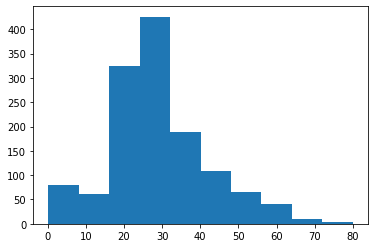

In [253]:
plt.hist(df.Age)

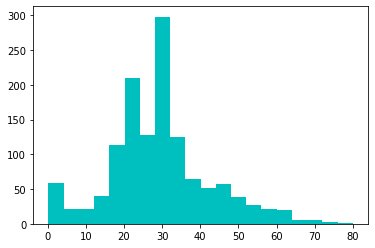

In [254]:
# we can get rid of additional information by plt.show()
# also we can create set bins and color
plt.hist(df.Age, bins=20, color='c')
plt.show()

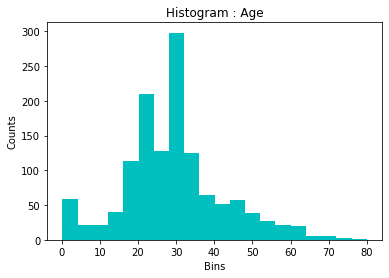

In [255]:
# Add title, X and y labels
plt.hist(df.Age, bins=20, color='c')
plt.title("Histogram : Age")
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

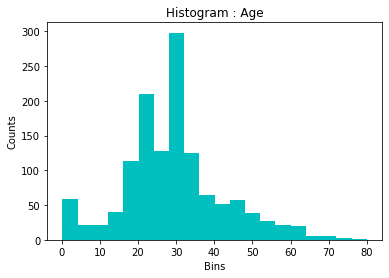

In [256]:
f, ax = plt.subplots()
ax.hist(df.Age, bins=20, color='c')
ax.set_title("Histogram : Age")
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')
plt.show()

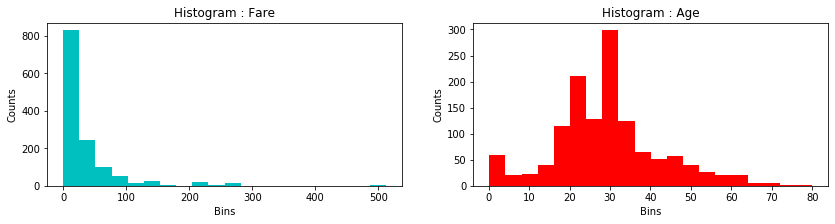

In [261]:
# Adding subplots

f, (ax1, ax2) = plt.subplots(1,2, figsize=(14,3))
ax1.hist(df.Fare, bins=20, color='c')
ax1.set_title("Histogram : Fare")
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Age, bins=20, color='r')
ax2.set_title("Histogram : Age")
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

plt.show()

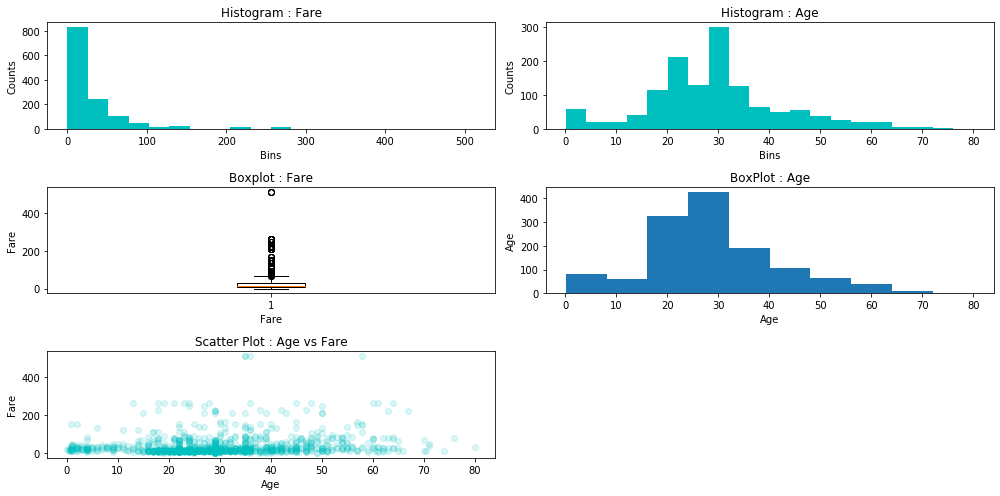

In [266]:
# Adding subplots
f, ax_arr = plt.subplots(3, 2, figsize = (14, 7))

#plot 1
ax_arr[0,0].hist(df.Fare, bins=20, color='c')
ax_arr[0,0].set_title("Histogram : Fare")
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

#plot 2
ax_arr[0,1].hist(df.Age, bins=20, color='c')
ax_arr[0,1].set_title("Histogram : Age")
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

#plot 3
ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title("Boxplot : Fare")
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

#plot 4
ax_arr[1,1].hist(df.Age.values)
ax_arr[1,1].set_title("BoxPlot : Age")
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')

#plot 5
ax_arr[2,0].scatter(df.Age, df.Fare, color='c', alpha=0.15)
ax_arr[2,0].set_title("Scatter Plot : Age vs Fare")
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

# this will delete any empty grpah. 
ax_arr[2,1].axis('off')
# this fix the overlapping issue between the plots
plt.tight_layout()
plt.show()